# Homework 2

Notes to students:  

1. Going forward, all homework assignments will be produced as notebooks independent of those presented in class.  You may feel free to use the notebooks presented in class to assist you with the homework.  
2. If you have already run a "CAPM" model for some other stock than AAPL and submitted it with Homework 1, please copy and paste your code and results for this homework assignment.  If you did not submit a CAPM for Homework 1, you will not be penalized.  Your "CAPM" model will be grade for this homework assignment.  If you are struggling because, for example, the New York Stock Exchange has a potentially discontinuous price series, please try using Yahoo, which also trades on the NASDAQ.  The goal is not to turn you into finance professionals, but to quickly get you engaged in statistical learning (using a well-understood model) and hypothesis testing.  
3. The question has been raised as to whether students of my class and Dr. Sobolevsky's class may work together on their Foundations Project.  Subject to the other constraints in the syllabus, we approve this request.

Please answer the questions below, disregarding any homework assignments in existing notebooks.

1. We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  Using R or Python,  generate two series of 1,000 random integers with values between 0 and 9.  Call one series $y$ and the other $x$.  Using R or Python, fit the bivariate linear regression model.  Examine the t-statistic on the coefficient that captures the relationship between $y$ and $x$ to evaluate whether it is greater than two in absolute value.  Would you reject or fail to reject that there is no relationship between these two series?

2. Download the file train.dta from the course website.  These data are formatted as a Stata dataset.  Read this dataset into R or Python.  (For R, you may find the “foreign” library of use.  For Python, we have already installed the Pandas library.  The goal here is to get you familiar with reading datasets with alternative formatting standards.)  Generate summary statistics for the two variables in the data:  (1) $d$, which is an indicator for whether a particular email is spam; and, (2) $x1$, which is an attribute of the email.  Using least squares, regress $d$ on $x1$.  Is the constant statistically significantly different than zero at a 95% level confidence?  Is the coefficient associated with $x1$ statistically significantly different that zero at a 95% level confidence?  Suppose you determine a threshold as to whether an email is spam if the predicted value of $d$ exceeds 1.  In turn, I give you a new email with an attribute value of 0.65 but do not provide a label for the email as to whether it is, in truth, spam.  Given the attribute value of 0.65, would you classify the incoming email as spam or not spam?  Suppose instead I give you another new email with an attribute value of 1.01, but again do not provide a label for the email.  Would you classify it as spam or not spam?

3. Using an API such as Quandl, download a daily price series for a particular publicly-traded stock of your choice for a five-year time period (don’t use Apple), as well as the daily price series on the exchange on which it trades.  Using R or Python, calculate the log returns of each series as the natural log of the ratio of (price today/price yesterday).  Use adjusted closing prices as they reflect so-called stock splits.  Using R or Python, generate a histogram of log returns of the stock of your choice.  Using R or Python, generate a scatterplot that relates the log returns of your stock of choice to the log returns of the exchange on which it is traded.  Finally, using R or Python, fit a linear model to obtain estimates of what finance folks call the "alpha" and the "beta".  Is "alpha" significantly different than zero at a 95% level of confidence?  Does a 95% confidence level for "beta" include one?  (Note that your results will depend on the stock price you use.)    

4. This is a very challenging set of questions, but they address several key topics in data analytics.  You may work with other students on a solution with the recognition that you may not complete this set of questions.  I have frequently used the phrase "data generating process" (or "DGP") to describe the hypothetical process by which observations of data arise in the real world.  We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  In this problem, we will work with a specific DGP and evaluate features of $\widehat \beta_1$, the least squares estimate of $\beta_1$.  Suppose your DGP is $y_i=1+2x_i+ϵ_i$, where $x \sim N(0,1)$ and $\epsilon \sim N(0,1)$.  Using R or Python, write code to generate 1,000 draws for $x$ and $\epsilon$.  Use these draws to generate $y$ in accordance with the given DGP.  Using R or Python, write code to estimate the bivariate model, $y_i=\beta_0+\beta_1 x_i$ and to summarize the findings.  

5. Repeat 4 above five different times for a new set of random draws for each replication.  (This effort is called Monte Carlo simulation.  Each time you generate a new set of data and estimate a model, you have a replication.  For example, here you have five replications.)   

6. Write code to automatically repeat 5 above 1,000 times (or 1,000 replications), each time automatically recording the estimated value of $\beta_1$.  Generate a histogram of these 1,000 replications of your estimates of $\beta_1$.  What does the dispersion of these replications measure?  

7. Suppose that you were not interested in the estimate of $\beta_1$, but instead in some functional transformation, such as the estimate of $\exp(\beta_1)$.  What might you do with your 1,000 replications from 6 above to inform you about the distribution of this transformation of $\beta_1$?

The following URL may prove useful - https://wiki.python.org/moin/ForLoop

Submit code and results.

## CAPM model for Verizon2
If you have already run a "CAPM" model for some other stock than AAPL and submitted it with Homework 1, please copy and paste your code and results for this homework assignment.  If you did not submit a CAPM for Homework 1, you will not be penalized.  Your "CAPM" model will be grade for this homework assignment.  If you are struggling because, for example, the New York Stock Exchange has a potentially discontinuous price series, please try using Yahoo, which also trades on the NASDAQ.  The goal is not to turn you into finance professionals, but to quickly get you engaged in statistical learning (using a well-understood model) and hypothesis testing.  

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


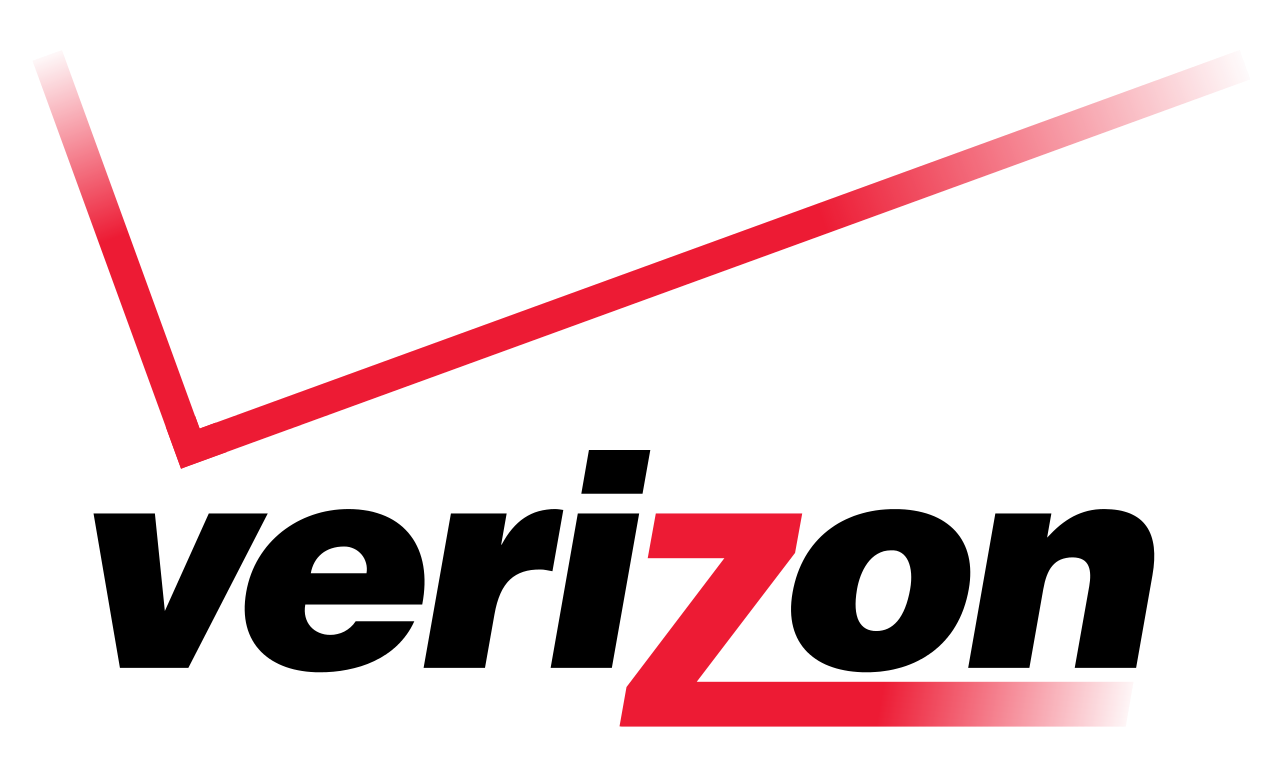

In [194]:
%pylab inline
from IPython.display import Image
Image(filename='/Users/ianina/2015fall/ADS/week1/Verizon_logo.svg.png') 

In [195]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [196]:
vz_all = Quandl.get("YAHOO/VZ", trim_start="2005-1-1")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2005-1-1")
vz = vz_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

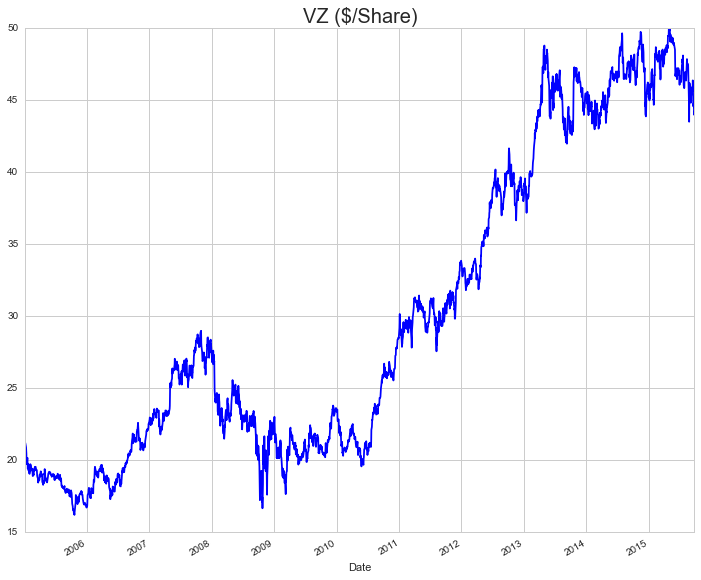

In [197]:
plt.figure(figsize = (12,10))
vz.plot(color='blue')
plt.title('VZ ($/Share)', fontsize=20)

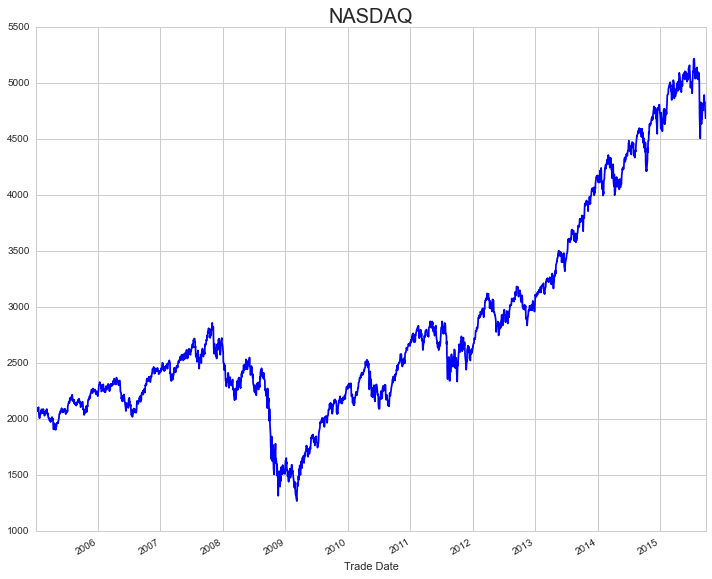

In [198]:
plt.figure(figsize = (12,10))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [199]:
vz_all = Quandl.get("YAHOO/VZ", trim_start="2010-1-1")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2010-1-1")
vz = vz_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

In [200]:
vz_returns = np.log(vz / vz.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
vz_returns = vz_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

In [201]:
print vz_returns.mean(), vz_returns.std()

0.000439222701233 0.0102723869505


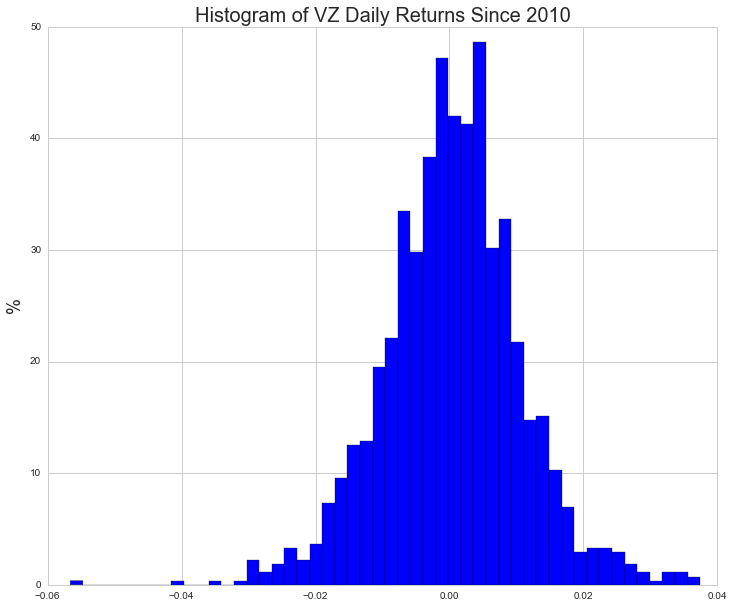

In [202]:
plt.figure(figsize= (12,10))
plt.hist(vz_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of VZ Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

In [203]:
print nasdaq_returns.mean(), nasdaq_returns.std()

0.00049106985255 0.0111820762963


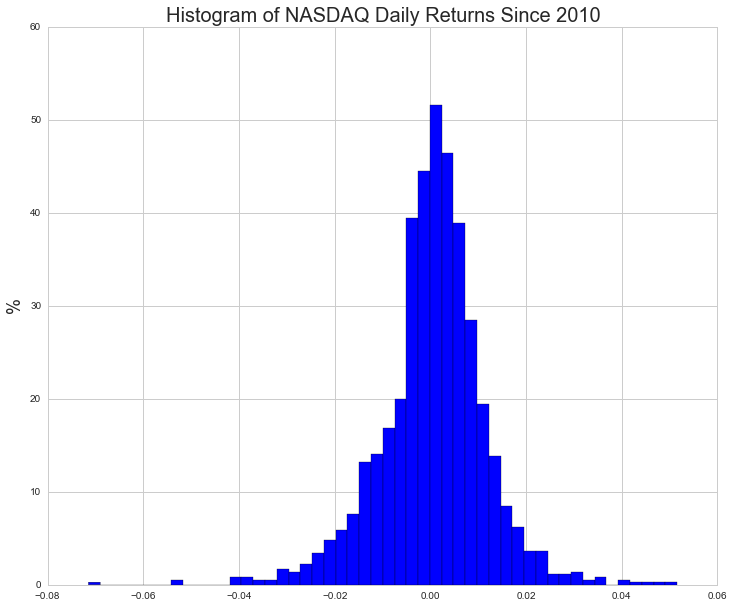

In [204]:
plt.figure(figsize= (12,10))
plt.hist(nasdaq_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

In [205]:
vz_returns = pd.DataFrame(vz_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)
vz_returns.info()
nasdaq_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2010-01-05 to 2015-09-25
Data columns (total 1 columns):
Adjusted Close    1442 non-null float64
dtypes: float64(1)
memory usage: 22.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2010-01-05 to 2015-09-25
Data columns (total 1 columns):
Index Value    1442 non-null float64
dtypes: float64(1)
memory usage: 22.5 KB


(-0.1, 0.1)

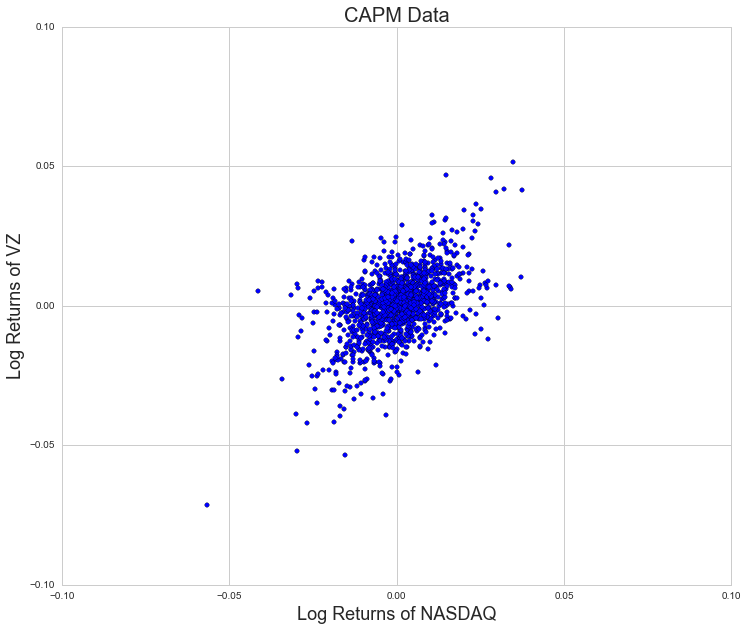

In [206]:
plt.figure(figsize = (12,10))
plt.scatter(vz_returns, nasdaq_returns)
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 18)
plt.ylabel('Log Returns of VZ', fontsize = 18)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [207]:
data = pd.merge(nasdaq_returns, vz_returns, left_index=True, right_index=True)
data.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'vz'}, inplace=True)
print data.mean()
print data.std()
mod = smf.ols(formula='vz ~ nasdaq', data = data).fit()
print(mod.summary())

nasdaq    0.000491
vz        0.000439
dtype: float64
nasdaq    0.011182
vz        0.010272
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     vz   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     529.0
Date:                Sat, 26 Sep 2015   Prob (F-statistic):          6.01e-100
Time:                        20:27:51   Log-Likelihood:                 4781.9
No. Observations:                1442   AIC:                            -9560.
Df Residuals:                    1440   BIC:                            -9549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------

(-0.1, 0.1)

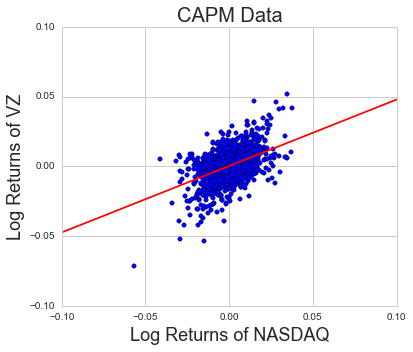

In [208]:
figure, ax = plt.subplots(figsize=(6,5))
ax.scatter(vz_returns, nasdaq_returns)
mod = smf.ols(formula='vz ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of VZ', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

In [209]:
print mod.f_test("nasdaq = 1")

<F test: F=array([[ 640.26411441]]), p=3.57749429278e-117, df_denom=1440, df_num=1>


In [210]:
print mod.f_test("Intercept = 0")

<F test: F=array([[ 0.78626025]]), p=0.375381404784, df_denom=1440, df_num=1>


In [211]:
print mod.f_test("nasdaq = 1, Intercept = 0")

<F test: F=array([[ 320.15715372]]), p=9.29278775215e-116, df_denom=1440, df_num=2>


## Question 1
We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  Using R or Python,  generate two series of 1,000 random integers with values between 0 and 9.  Call one series $y$ and the other $x$.  Using R or Python, fit the bivariate linear regression model.  Examine the t-statistic on the coefficient that captures the relationship between $y$ and $x$ to evaluate whether it is greater than two in absolute value.  Would you reject or fail to reject that there is no relationship between these two series?

In [212]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
x = np.random.random_integers(0, 9, 1000)
y = np.random.random_integers(0, 9, 1000)

In [214]:
data1 = pd.DataFrame(x,y)

In [215]:
mod = smf.ols(formula='y ~ x', data = data1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.247
Date:                Sat, 26 Sep 2015   Prob (F-statistic):             0.0396
Time:                        20:27:52   Log-Likelihood:                -2467.5
No. Observations:                1000   AIC:                             4939.
Df Residuals:                     998   BIC:                             4949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.2775      0.168     25.426      0.0

## Question 2
Download the file train.dta from the course website.  These data are formatted as a Stata dataset.  Read this dataset into R or Python.  (For R, you may find the “foreign” library of use.  For Python, we have already installed the Pandas library.  The goal here is to get you familiar with reading datasets with alternative formatting standards.)  Generate summary statistics for the two variables in the data:  (1) $d$, which is an indicator for whether a particular email is spam; and, (2) $x1$, which is an attribute of the email.  Using least squares, regress $d$ on $x1$.  Is the constant statistically significantly different than zero at a 95% level confidence?  Is the coefficient associated with $x1$ statistically significantly different that zero at a 95% level confidence?  Suppose you determine a threshold as to whether an email is spam if the predicted value of $d$ exceeds 1.  In turn, I give you a new email with an attribute value of 0.65 but do not provide a label for the email as to whether it is, in truth, spam.  Given the attribute value of 0.65, would you classify the incoming email as spam or not spam?  Suppose instead I give you another new email with an attribute value of 1.01, but again do not provide a label for the email.  Would you classify it as spam or not spam?

In [216]:
data2 = pd.read_stata('train.dta')
data2.describe()

,d,x1
count,1000.00000,1000.000000
mean,0.47700,0.487376
std,0.49972,0.283345
min,0.00000,0.000286
25%,0.00000,0.249382
50%,0.00000,0.484645
75%,1.00000,0.732494
max,1.00000,0.999006


In [217]:
mod = smf.ols(formula='d ~ x1', data = data2).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     495.0
Date:                Sat, 26 Sep 2015   Prob (F-statistic):           2.21e-89
Time:                        20:27:52   Log-Likelihood:                -523.32
No. Observations:                1000   AIC:                             1051.
Df Residuals:                     998   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0180      0.026     -0.698      0.4

## Question 3
Using an API such as Quandl, download a daily price series for a particular publicly-traded stock of your choice for a five-year time period (don’t use Apple), as well as the daily price series on the exchange on which it trades. Using R or Python, calculate the log returns of each series as the natural log of the ratio of (price today/price yesterday). Use adjusted closing prices as they reflect so-called stock splits. Using R or Python, generate a histogram of log returns of the stock of your choice. Using R or Python, generate a scatterplot that relates the log returns of your stock of choice to the log returns of the exchange on which it is traded. Finally, using R or Python, fit a linear model to obtain estimates of what finance folks call the "alpha" and the "beta". Is "alpha" significantly different than zero at a 95% level of confidence? Does a 95% confidence level for "beta" include one? (Note that your results will depend on the stock price you use.)

In [218]:
%pylab inline
import matplotlib.pyplot as plt
import pandas.io.data as web
import Quandl
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [219]:
# Download 5 years of verizon and NASDAQ data using Quandl.
vz_all = Quandl.get("YAHOO/VZ", trim_start="2010-9-24", trim_end="2015-9-24")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2010-9-24", trim_end="2015-9-24")
vz = vz_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

In [220]:
# Calculate log returns.
vz_returns = np.log(vz / vz.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
vz_returns = vz_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

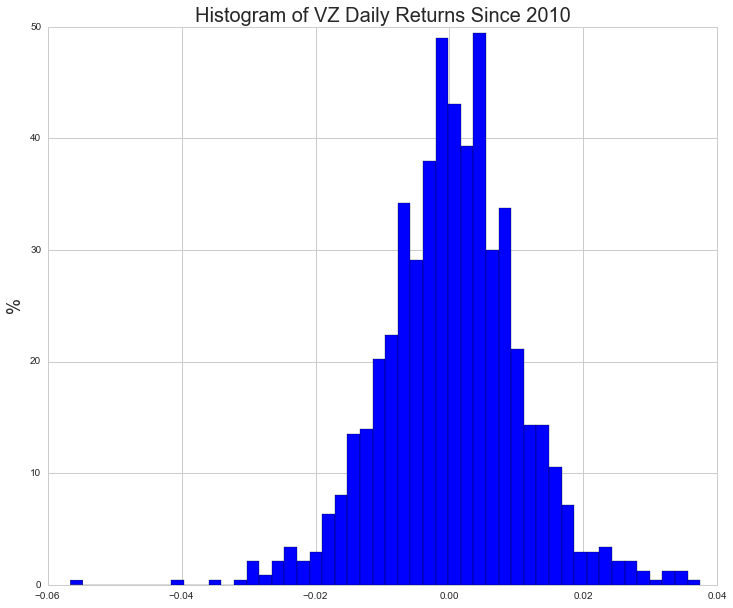

In [221]:
plt.figure(figsize= (12,10))
plt.hist(vz_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of VZ Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

(-0.1, 0.1)

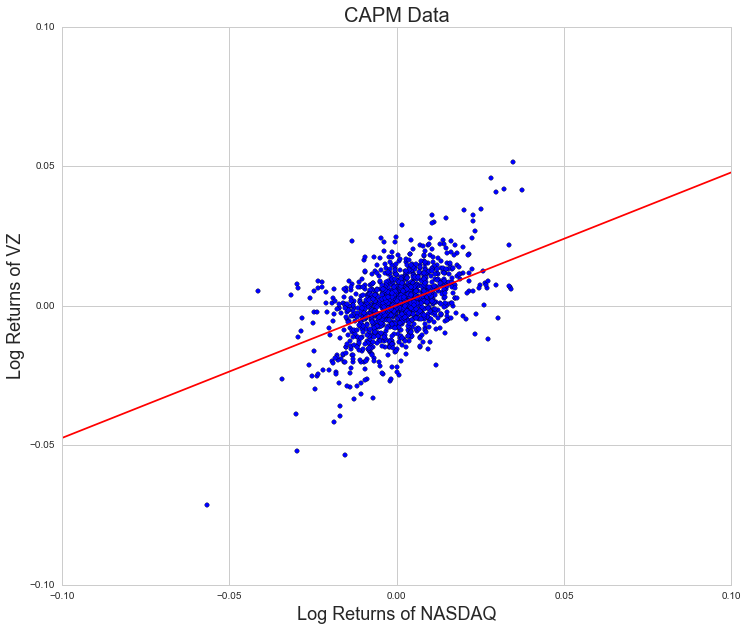

In [222]:
figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(vz_returns, nasdaq_returns)
mod = smf.ols(formula='vz ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of VZ', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

In [223]:
# Create dataframes for merge and regression.
vz_returns = pd.DataFrame(vz_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

In [224]:
# Merge and rename.
data3 = pd.merge(nasdaq_returns, vz_returns, left_index=True, right_index=True)
data3.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'vz'}, inplace=True)

In [225]:
# Use StatsModels Formula, which emulates R formula style.
# Run CAPM and review results.
mod = smf.ols(formula='vz ~ nasdaq', data = data3).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     vz   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     433.2
Date:                Sat, 26 Sep 2015   Prob (F-statistic):           6.68e-83
Time:                        20:27:55   Log-Likelihood:                 4169.3
No. Observations:                1258   AIC:                            -8335.
Df Residuals:                    1256   BIC:                            -8324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.666      0.5

In [226]:
print mod.f_test("nasdaq = 1")

<F test: F=array([[ 509.79284698]]), p=5.11227138386e-95, df_denom=1256, df_num=1>


In [227]:
print mod.f_test("Intercept = 0")

<F test: F=array([[ 0.44387451]]), p=0.505380649153, df_denom=1256, df_num=1>


## Question 4
This is a very challenging set of questions, but they address several key topics in data analytics.  You may work with other students on a solution with the recognition that you may not complete this set of questions.  I have frequently used the phrase "data generating process" (or "DGP") to describe the hypothetical process by which observations of data arise in the real world.  We discussed at some length the bivariate linear regression model, $y_i=\beta_0+\beta_1 x_i+\epsilon_i$.  In this problem, we will work with a specific DGP and evaluate features of $\widehat \beta_1$, the least squares estimate of $\beta_1$.  Suppose your DGP is $y_i=1+2x_i+ϵ_i$, where $x \sim N(0,1)$ and $\epsilon \sim N(0,1)$.  Using R or Python, write code to generate 1,000 draws for $x$ and $\epsilon$.  Use these draws to generate $y$ in accordance with the given DGP.  Using R or Python, write code to estimate the bivariate model, $y_i=\beta_0+\beta_1 x_i$ and to summarize the findings. 

In [228]:
# Generator normal error and feature.  
e = np.random.normal(0, 1, 1000)  
x = np.random.normal(0, 1, 1000) 
# DGPs for y
y = 1 + 2 * x + e  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     4156.
Date:                Sat, 26 Sep 2015   Prob (F-statistic):               0.00
Time:                        20:27:55   Log-Likelihood:                -1382.5
No. Observations:                1000   AIC:                             2769.
Df Residuals:                     998   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0181      0.031     33.298      0.0

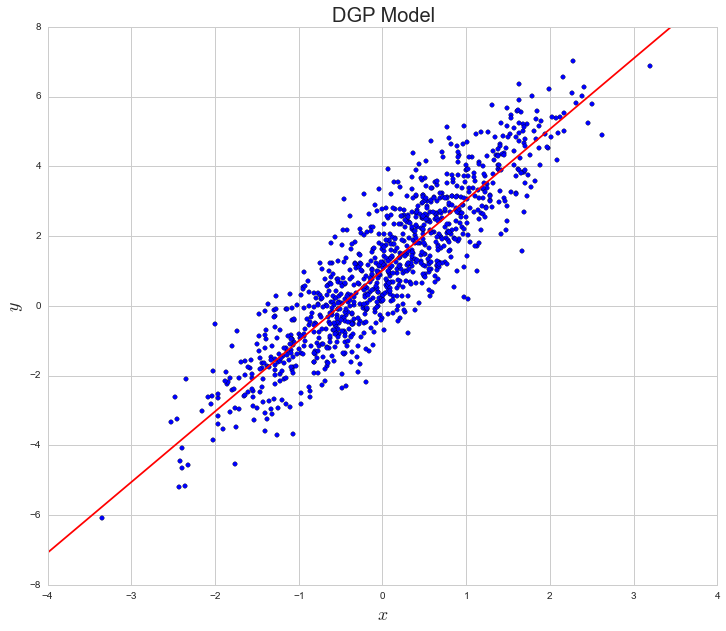

In [229]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
data4 = pd.merge(y, x, left_index=True, right_index=True)
mod4 = smf.ols(formula='y ~ x', data=data4).fit()

figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(x, y)
abline_plot(model_results=mod4, ax=ax, color='red')
ax.set_title('DGP Model', fontsize = 20)
ax.set_ylabel(r'$y$', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 18)

print(mod4.summary())

## Question 5
Repeat 4 above five different times for a new set of random draws for each replication.  (This effort is called Monte Carlo simulation.  Each time you generate a new set of data and estimate a model, you have a replication.  For example, here you have five replications.)

In [230]:
beta1 = []
for i in range(5):
    e = np.random.normal(0, 1, 1000)  
    x = np.random.normal(0, 1, 1000) 
    y = 1 + 2 * x + e  
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    data = pd.merge(x, y, left_index=True, right_index=True)
    mod = smf.ols(formula='y ~ x', data=data).fit()
    beta1.append(mod.params.x)
beta1

[1.9827810015899356,
 2.0158631916616132,
 2.0284561344924681,
 2.0287918343172135,
 1.9793322885839513]

## Question 6
Write code to automatically repeat 5 above 1,000 times (or 1,000 replications), each time automatically recording the estimated value of $\beta_1$.  Generate a histogram of these 1,000 replications of your estimates of $\beta_1$.  What does the dispersion of these replications measure?

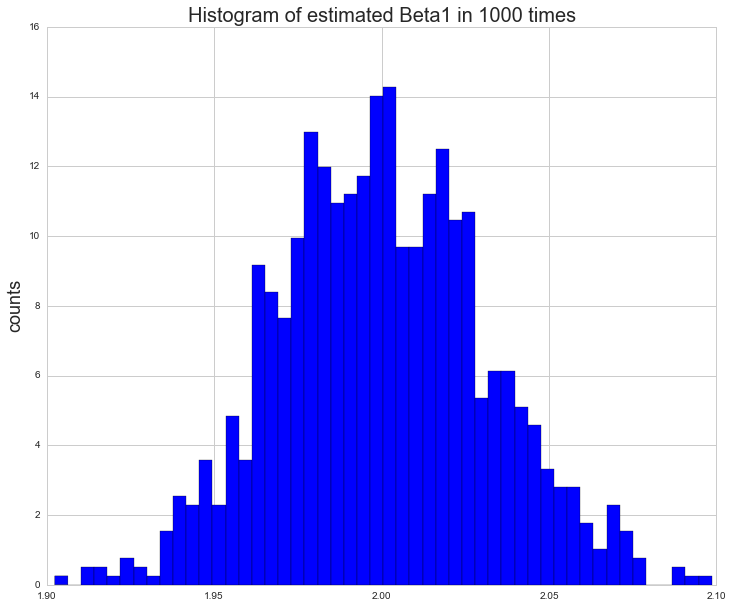

In [231]:
beta1New = []
for i in range(1000):
    e = np.random.normal(0, 1, 1000)  
    x = np.random.normal(0, 1, 1000) 
    y = 1 + 2 * x + e  
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    data = pd.merge(x, y, left_index=True, right_index=True)
    mod = smf.ols(formula='y ~ x', data=data).fit()
    beta1New.append(mod.params.x)

plt.figure(figsize= (12,10))
plt.hist(beta1New, bins=50, normed=True, color='blue')
plt.title('Histogram of estimated Beta1 in 1000 times', fontsize=20)
plt.ylabel('counts', fontsize=18)

## Question 7
Suppose that you were not interested in the estimate of $\beta_1$, but instead in some functional transformation, such as the estimate of $\exp(\beta_1)$.  What might you do with your 1,000 replications from 6 above to inform you about the distribution of this transformation of $\beta_1$?

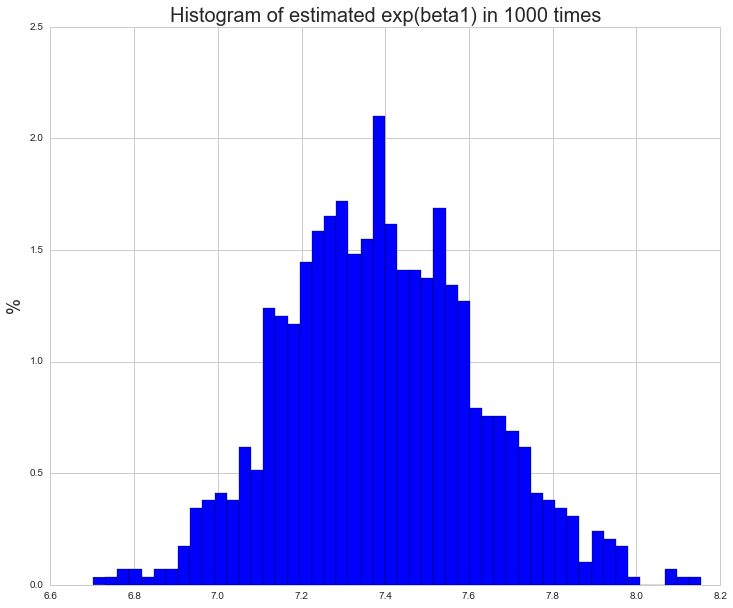

In [232]:
beta1NewExp = exp(beta1New)
plt.figure(figsize= (12,10))
plt.hist(beta1NewExp, bins=50, normed=True, color='blue')
plt.title('Histogram of estimated exp(beta1) in 1000 times', fontsize=20)
plt.ylabel('%', fontsize=18)